In [ ]:
# pip install NeuralForecast

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS
from neuralforecast.models import NBEATS,FEDformer
from neuralforecast.losses.numpy import mae, mse

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# X_df = pd.read_csv('/content/drive/MyDrive/AML/weather/M/df_x.csv')
# Y_df = pd.read_csv('/content/drive/MyDrive/AML/weather/M/df_y.csv')

X_df = pd.read_csv('@datasets_reproducibity/weather/M/df_x.csv')
Y_df = pd.read_csv('@datasets_reproducibity/weather/M/df_y.csv')

# X_df = pd.read_csv('/content/df_x.csv')
# Y_df = pd.read_csv('/content/df_y.csv')

In [ ]:
X_df

,ds,ex_1,ex_2,ex_3,ex_4
0,2020-01-01 00:10:00,-0.5,-0.166667,-0.5,-0.5
1,2020-01-01 00:20:00,-0.5,-0.166667,-0.5,-0.5
2,2020-01-01 00:30:00,-0.5,-0.166667,-0.5,-0.5
3,2020-01-01 00:40:00,-0.5,-0.166667,-0.5,-0.5
4,2020-01-01 00:50:00,-0.5,-0.166667,-0.5,-0.5
...,...,...,...,...,...
52690,2020-12-31 23:20:00,0.5,0.000000,0.5,0.5
52691,2020-12-31 23:30:00,0.5,0.000000,0.5,0.5
52692,2020-12-31 23:40:00,0.5,0.000000,0.5,0.5
52693,2020-12-31 23:50:00,0.5,0.000000,0.5,0.5


In [ ]:
a=Y_df['unique_id'].unique()
a.size

21

In [ ]:
merged_df = pd.merge(Y_df, X_df[['ds', 'ex_1', 'ex_2','ex_3','ex_4']], on='ds', how='left')
merged_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2020-01-01 00:10:00,p (mbar),2.114257,-0.5,-0.166667,-0.5,-0.5
1,2020-01-01 00:10:00,T (degC),-1.459980,-0.5,-0.166667,-0.5,-0.5
2,2020-01-01 00:10:00,Tpot (K),-1.607935,-0.5,-0.166667,-0.5,-0.5
3,2020-01-01 00:10:00,Tdew (degC),-1.052596,-0.5,-0.166667,-0.5,-0.5
4,2020-01-01 00:10:00,rh (%),0.990128,-0.5,-0.166667,-0.5,-0.5
...,...,...,...,...,...,...,...
1106590,2021-01-01 00:00:00,SWDR (W/m�),-0.672767,-0.5,0.166667,-0.5,-0.5
1106591,2021-01-01 00:00:00,PAR (�mol/m�/s),-0.679493,-0.5,0.166667,-0.5,-0.5
1106592,2021-01-01 00:00:00,max. PAR (�mol/m�/s),-0.588296,-0.5,0.166667,-0.5,-0.5
1106593,2021-01-01 00:00:00,Tlog (degC),-1.169683,-0.5,0.166667,-0.5,-0.5


In [ ]:
filtered_df = merged_df[merged_df['unique_id'] == 'OT']
filtered_df.reset_index(drop=True, inplace=True)
filtered_df.drop("ds",axis=1,inplace=True)
# filtered_df['ds'] = pd.to_datetime(filtered_df['ds'])
filtered_df['ds'] = range(len(filtered_df))

Y_df=filtered_df
Y_df

/tmp/ipykernel_10849/2816410556.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop("ds",axis=1,inplace=True)
/tmp/ipykernel_10849/2816410556.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ds'] = range(len(filtered_df))


,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,0.044395,-0.5,-0.166667,-0.5,-0.5,0
1,OT,0.044134,-0.5,-0.166667,-0.5,-0.5,1
2,OT,0.043092,-0.5,-0.166667,-0.5,-0.5,2
3,OT,0.049343,-0.5,-0.166667,-0.5,-0.5,3
4,OT,0.055073,-0.5,-0.166667,-0.5,-0.5,4
...,...,...,...,...,...,...,...
52690,OT,0.057157,0.5,0.000000,0.5,0.5,52690
52691,OT,0.074346,0.5,0.000000,0.5,0.5,52691
52692,OT,0.062886,0.5,0.000000,0.5,0.5,52692
52693,OT,0.059501,0.5,0.000000,0.5,0.5,52693


In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,0.044395,-0.5,-0.166667,-0.5,-0.5,0
1,OT,0.044134,-0.5,-0.166667,-0.5,-0.5,1
2,OT,0.043092,-0.5,-0.166667,-0.5,-0.5,2
3,OT,0.049343,-0.5,-0.166667,-0.5,-0.5,3
4,OT,0.055073,-0.5,-0.166667,-0.5,-0.5,4
...,...,...,...,...,...,...,...
52690,OT,0.057157,0.5,0.000000,0.5,0.5,52690
52691,OT,0.074346,0.5,0.000000,0.5,0.5,52691
52692,OT,0.062886,0.5,0.000000,0.5,0.5,52692
52693,OT,0.059501,0.5,0.000000,0.5,0.5,52693


In [ ]:
Y_df['unique_id'].unique()

array(['OT'], dtype=object)

In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,0.044395,-0.5,-0.166667,-0.5,-0.5,0
1,OT,0.044134,-0.5,-0.166667,-0.5,-0.5,1
2,OT,0.043092,-0.5,-0.166667,-0.5,-0.5,2
3,OT,0.049343,-0.5,-0.166667,-0.5,-0.5,3
4,OT,0.055073,-0.5,-0.166667,-0.5,-0.5,4
...,...,...,...,...,...,...,...
52690,OT,0.057157,0.5,0.000000,0.5,0.5,52690
52691,OT,0.074346,0.5,0.000000,0.5,0.5,52691
52692,OT,0.062886,0.5,0.000000,0.5,0.5,52692
52693,OT,0.059501,0.5,0.000000,0.5,0.5,52693


## Horizon 96

In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,0.044395,-0.5,-0.166667,-0.5,-0.5,0
1,OT,0.044134,-0.5,-0.166667,-0.5,-0.5,1
2,OT,0.043092,-0.5,-0.166667,-0.5,-0.5,2
3,OT,0.049343,-0.5,-0.166667,-0.5,-0.5,3
4,OT,0.055073,-0.5,-0.166667,-0.5,-0.5,4
...,...,...,...,...,...,...,...
52690,OT,0.057157,0.5,0.000000,0.5,0.5,52690
52691,OT,0.074346,0.5,0.000000,0.5,0.5,52691
52692,OT,0.062886,0.5,0.000000,0.5,0.5,52692
52693,OT,0.059501,0.5,0.000000,0.5,0.5,52693


In [ ]:
Y_train_df = Y_df.iloc[:52599,:]
Y_test_df = Y_df.iloc[52599:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,52599,OT,0.048562,-0.152174,0.000000,0.5,0.5,52599
1,52600,OT,0.048822,-0.152174,0.000000,0.5,0.5,52600
2,52601,OT,0.052469,-0.152174,0.000000,0.5,0.5,52601
3,52602,OT,0.055333,-0.152174,0.000000,0.5,0.5,52602
4,52603,OT,0.052469,-0.152174,0.000000,0.5,0.5,52603
...,...,...,...,...,...,...,...,...
91,52690,OT,0.057157,0.500000,0.000000,0.5,0.5,52690
92,52691,OT,0.074346,0.500000,0.000000,0.5,0.5,52691
93,52692,OT,0.062886,0.500000,0.000000,0.5,0.5,52692
94,52693,OT,0.059501,0.500000,0.000000,0.5,0.5,52693


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,0.048562,-0.152174,0.000000,0.5,0.5,52599
1,OT,0.048822,-0.152174,0.000000,0.5,0.5,52600
2,OT,0.052469,-0.152174,0.000000,0.5,0.5,52601
3,OT,0.055333,-0.152174,0.000000,0.5,0.5,52602
4,OT,0.052469,-0.152174,0.000000,0.5,0.5,52603
...,...,...,...,...,...,...,...
91,OT,0.057157,0.500000,0.000000,0.5,0.5,52690
92,OT,0.074346,0.500000,0.000000,0.5,0.5,52691
93,OT,0.062886,0.500000,0.000000,0.5,0.5,52692
94,OT,0.059501,0.500000,0.000000,0.5,0.5,52693


In [ ]:
horizon = 96
model = Informer(h=horizon, input_size=24,
               max_steps=100,
               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | enc_embedding | DataEmbedding | 384   
4 | dec_embedding | DataEmbedding | 384   
5 | encoder       | TransEncoder  | 199 K 
6 | decoder       | TransDecoder  | 141 K 
------------------------------------------------
341 K     Trainable params
0         Non-trainable params
341 K     Total params
1.368     Total estimated model params size (MB)


Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=100` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Informer
unique_id,,
OT,0,0.088730
OT,1,0.099014
OT,2,0.084668
OT,3,0.072570
OT,4,0.057934
...,...,...
OT,91,0.034300
OT,92,0.022766
OT,93,0.031671


<Axes: xlabel='ds'>

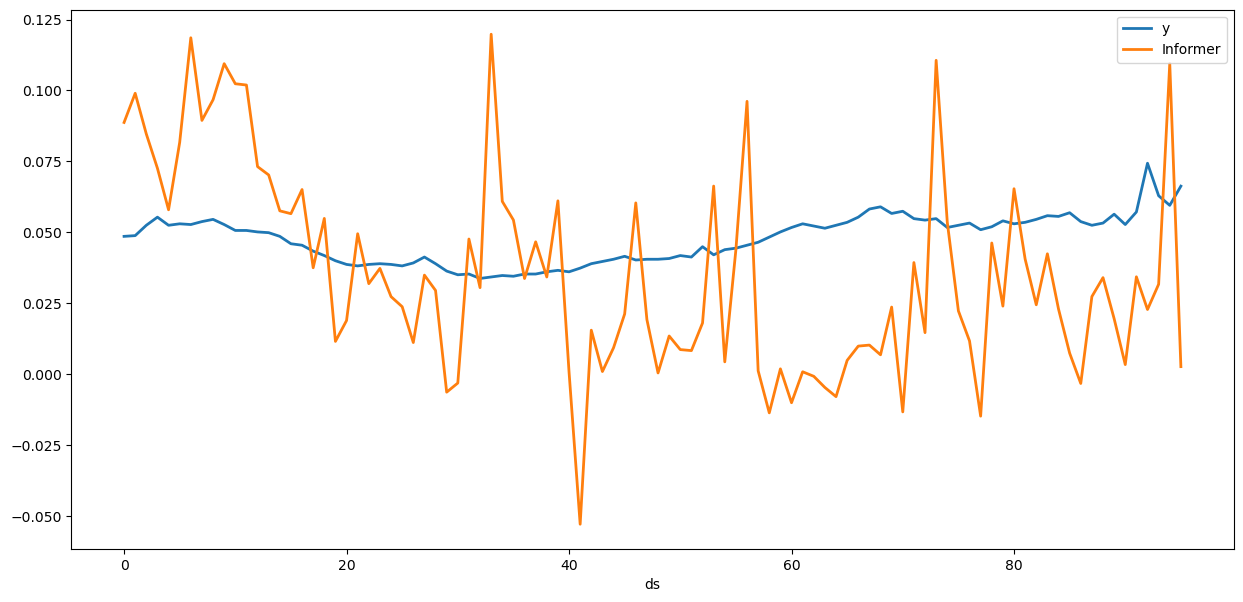

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Informer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,Informer
ds,
0,0.088730
1,0.099014
2,0.084668
3,0.072570
4,0.057934
...,...
91,0.034300
92,0.022766
93,0.031671


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_Informer = mae(Y_test_df['y'], forecasts['Informer'])
mse_Informer = mse(Y_test_df['y'], forecasts['Informer'])
print(f'Informer MAE: {mae_Informer:.5f}')
print(f'Informer MSE: {mse_Informer:.5f}')

Informer MAE: 0.03252
Informer MSE: 0.00145


## Horizon 192

In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,0.044395,-0.5,-0.166667,-0.5,-0.5,0
1,OT,0.044134,-0.5,-0.166667,-0.5,-0.5,1
2,OT,0.043092,-0.5,-0.166667,-0.5,-0.5,2
3,OT,0.049343,-0.5,-0.166667,-0.5,-0.5,3
4,OT,0.055073,-0.5,-0.166667,-0.5,-0.5,4
...,...,...,...,...,...,...,...
52690,OT,0.057157,0.5,0.000000,0.5,0.5,52690
52691,OT,0.074346,0.5,0.000000,0.5,0.5,52691
52692,OT,0.062886,0.5,0.000000,0.5,0.5,52692
52693,OT,0.059501,0.5,0.000000,0.5,0.5,52693


In [ ]:
Y_train_df = Y_df.iloc[:52499,:]
Y_test_df = Y_df.iloc[52499:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,52499,OT,0.039707,0.152174,-0.166667,0.466667,0.49726,52499
1,52500,OT,0.041009,0.152174,-0.166667,0.466667,0.49726,52500
2,52501,OT,0.040488,0.152174,-0.166667,0.466667,0.49726,52501
3,52502,OT,0.039967,0.195652,-0.166667,0.466667,0.49726,52502
4,52503,OT,0.038404,0.195652,-0.166667,0.466667,0.49726,52503
...,...,...,...,...,...,...,...,...
191,52690,OT,0.057157,0.500000,0.000000,0.500000,0.50000,52690
192,52691,OT,0.074346,0.500000,0.000000,0.500000,0.50000,52691
193,52692,OT,0.062886,0.500000,0.000000,0.500000,0.50000,52692
194,52693,OT,0.059501,0.500000,0.000000,0.500000,0.50000,52693


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,0.039707,0.152174,-0.166667,0.466667,0.49726,52499
1,OT,0.041009,0.152174,-0.166667,0.466667,0.49726,52500
2,OT,0.040488,0.152174,-0.166667,0.466667,0.49726,52501
3,OT,0.039967,0.195652,-0.166667,0.466667,0.49726,52502
4,OT,0.038404,0.195652,-0.166667,0.466667,0.49726,52503
...,...,...,...,...,...,...,...
191,OT,0.057157,0.500000,0.000000,0.500000,0.50000,52690
192,OT,0.074346,0.500000,0.000000,0.500000,0.50000,52691
193,OT,0.062886,0.500000,0.000000,0.500000,0.50000,52692
194,OT,0.059501,0.500000,0.000000,0.500000,0.50000,52693


In [ ]:
horizon = 192
model = Informer(h=horizon, input_size=24,
               max_steps=100,
               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | enc_embedding | DataEmbedding | 384   
4 | dec_embedding | DataEmbedding | 384   
5 | encoder       | TransEncoder  | 199 K 
6 | decoder       | TransDecoder  | 141 K 
------------------------------------------------
341 K     Trainable params
0         Non-trainable params
341 K     Total params
1.368     Total estimated model params size (MB)


Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=100` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Informer
unique_id,,
OT,0,0.060979
OT,1,0.069473
OT,2,0.030351
OT,3,0.071498
OT,4,0.022428
...,...,...
OT,187,-0.002651
OT,188,-0.000631
OT,189,0.007635


<Axes: xlabel='ds'>

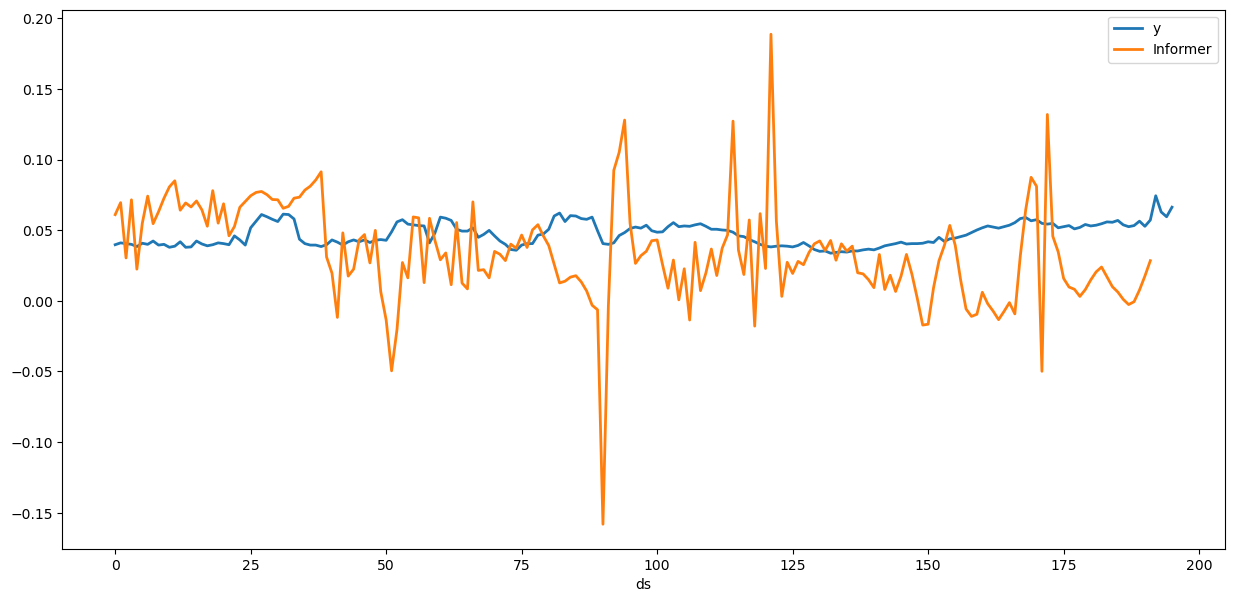

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Informer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,Informer
ds,
0,0.060979
1,0.069473
2,0.030351
3,0.071498
4,0.022428
...,...
187,-0.002651
188,-0.000631
189,0.007635


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_Informer = mae(Y_test_df['y'], forecasts['Informer'])
mse_Informer = mse(Y_test_df['y'], forecasts['Informer'])
print(f'Informer MAE: {mae_Informer:.4f}')
print(f'Informer MSE: {mse_Informer:.4f}')

Informer MAE: 0.0303
Informer MSE: 0.0016


## Horizon 336

In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,0.044395,-0.5,-0.166667,-0.5,-0.5,0
1,OT,0.044134,-0.5,-0.166667,-0.5,-0.5,1
2,OT,0.043092,-0.5,-0.166667,-0.5,-0.5,2
3,OT,0.049343,-0.5,-0.166667,-0.5,-0.5,3
4,OT,0.055073,-0.5,-0.166667,-0.5,-0.5,4
...,...,...,...,...,...,...,...
52690,OT,0.057157,0.5,0.000000,0.5,0.5,52690
52691,OT,0.074346,0.5,0.000000,0.5,0.5,52691
52692,OT,0.062886,0.5,0.000000,0.5,0.5,52692
52693,OT,0.059501,0.5,0.000000,0.5,0.5,52693


In [ ]:
Y_train_df = Y_df.iloc[:52359,:]
Y_test_df = Y_df.iloc[52359:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,52359,OT,0.040488,0.195652,-0.333333,0.433333,0.494521,52359
1,52360,OT,0.041269,0.195652,-0.333333,0.433333,0.494521,52360
2,52361,OT,0.038144,0.195652,-0.333333,0.433333,0.494521,52361
3,52362,OT,0.037884,0.195652,-0.333333,0.433333,0.494521,52362
4,52363,OT,0.036842,0.195652,-0.333333,0.433333,0.494521,52363
...,...,...,...,...,...,...,...,...
331,52690,OT,0.057157,0.500000,0.000000,0.500000,0.500000,52690
332,52691,OT,0.074346,0.500000,0.000000,0.500000,0.500000,52691
333,52692,OT,0.062886,0.500000,0.000000,0.500000,0.500000,52692
334,52693,OT,0.059501,0.500000,0.000000,0.500000,0.500000,52693


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,0.040488,0.195652,-0.333333,0.433333,0.494521,52359
1,OT,0.041269,0.195652,-0.333333,0.433333,0.494521,52360
2,OT,0.038144,0.195652,-0.333333,0.433333,0.494521,52361
3,OT,0.037884,0.195652,-0.333333,0.433333,0.494521,52362
4,OT,0.036842,0.195652,-0.333333,0.433333,0.494521,52363
...,...,...,...,...,...,...,...
331,OT,0.057157,0.500000,0.000000,0.500000,0.500000,52690
332,OT,0.074346,0.500000,0.000000,0.500000,0.500000,52691
333,OT,0.062886,0.500000,0.000000,0.500000,0.500000,52692
334,OT,0.059501,0.500000,0.000000,0.500000,0.500000,52693


In [ ]:
horizon = 336
model = Informer(h=horizon, input_size=24,
               max_steps=200,
               )

Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | enc_embedding | DataEmbedding | 384   
4 | dec_embedding | DataEmbedding | 384   
5 | encoder       | TransEncoder  | 199 K 
6 | decoder       | TransDecoder  | 141 K 
------------------------------------------------
341 K     Trainable params
0         Non-trainable params
341 K     Total params
1.368     Total estimated model params size (MB)


Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=200` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Informer
unique_id,,
OT,0,0.036199
OT,1,0.042046
OT,2,0.036090
OT,3,0.038497
OT,4,0.034533
...,...,...
OT,331,0.034087
OT,332,0.039087
OT,333,0.043751


<Axes: xlabel='ds'>

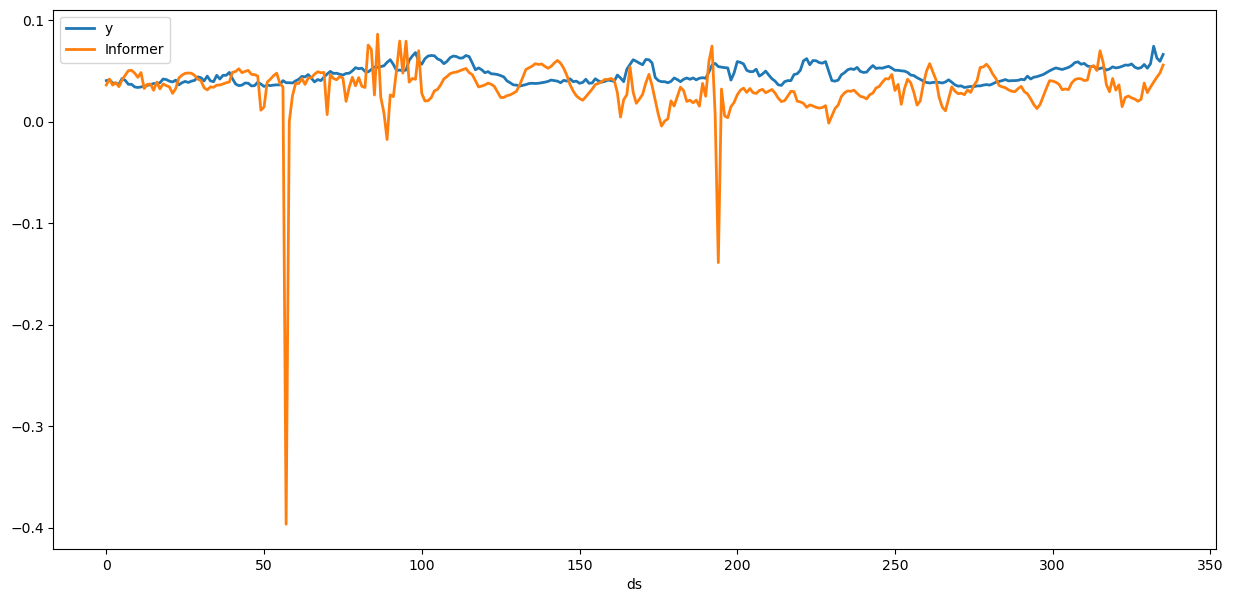

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Informer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,Informer
ds,
0,0.036199
1,0.042046
2,0.036090
3,0.038497
4,0.034533
...,...
331,0.034087
332,0.039087
333,0.043751


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_Informer = mae(Y_test_df['y'], forecasts['Informer'])
mse_Informer = mse(Y_test_df['y'], forecasts['Informer'])
print(f'Informer MAE: {mae_Informer:.3f}')
print(f'Informer MSE: {mse_Informer:.3f}')

Informer MAE: 0.019
Informer MSE: 0.001


## Horizon 720

In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,0.044395,-0.5,-0.166667,-0.5,-0.5,0
1,OT,0.044134,-0.5,-0.166667,-0.5,-0.5,1
2,OT,0.043092,-0.5,-0.166667,-0.5,-0.5,2
3,OT,0.049343,-0.5,-0.166667,-0.5,-0.5,3
4,OT,0.055073,-0.5,-0.166667,-0.5,-0.5,4
...,...,...,...,...,...,...,...
52690,OT,0.057157,0.5,0.000000,0.5,0.5,52690
52691,OT,0.074346,0.5,0.000000,0.5,0.5,52691
52692,OT,0.062886,0.5,0.000000,0.5,0.5,52692
52693,OT,0.059501,0.5,0.000000,0.5,0.5,52693


In [ ]:
Y_train_df = Y_df.iloc[:51975,:]
Y_test_df = Y_df.iloc[51975:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,51975,OT,0.032675,-0.5,0.500000,0.366667,0.489041,51975
1,51976,OT,0.030852,-0.5,0.500000,0.366667,0.489041,51976
2,51977,OT,0.027987,-0.5,0.500000,0.366667,0.489041,51977
3,51978,OT,0.027466,-0.5,0.500000,0.366667,0.489041,51978
4,51979,OT,0.027466,-0.5,0.500000,0.366667,0.489041,51979
...,...,...,...,...,...,...,...,...
715,52690,OT,0.057157,0.5,0.000000,0.500000,0.500000,52690
716,52691,OT,0.074346,0.5,0.000000,0.500000,0.500000,52691
717,52692,OT,0.062886,0.5,0.000000,0.500000,0.500000,52692
718,52693,OT,0.059501,0.5,0.000000,0.500000,0.500000,52693


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,0.032675,-0.5,0.500000,0.366667,0.489041,51975
1,OT,0.030852,-0.5,0.500000,0.366667,0.489041,51976
2,OT,0.027987,-0.5,0.500000,0.366667,0.489041,51977
3,OT,0.027466,-0.5,0.500000,0.366667,0.489041,51978
4,OT,0.027466,-0.5,0.500000,0.366667,0.489041,51979
...,...,...,...,...,...,...,...
715,OT,0.057157,0.5,0.000000,0.500000,0.500000,52690
716,OT,0.074346,0.5,0.000000,0.500000,0.500000,52691
717,OT,0.062886,0.5,0.000000,0.500000,0.500000,52692
718,OT,0.059501,0.5,0.000000,0.500000,0.500000,52693


In [ ]:
horizon = 720
model = Informer(h=horizon, input_size=24,
               max_steps=200,
               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | enc_embedding | DataEmbedding | 384   
4 | dec_embedding | DataEmbedding | 384   
5 | encoder       | TransEncoder  | 199 K 
6 | decoder       | TransDecoder  | 141 K 
------------------------------------------------
341 K     Trainable params
0         Non-trainable params
341 K     Total params
1.368     Total estimated model params size (MB)


Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=200` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Informer
unique_id,,
OT,0,0.035221
OT,1,0.023764
OT,2,0.020490
OT,3,0.041912
OT,4,0.041600
...,...,...
OT,715,0.045954
OT,716,0.046467
OT,717,0.045692


<Axes: xlabel='ds'>

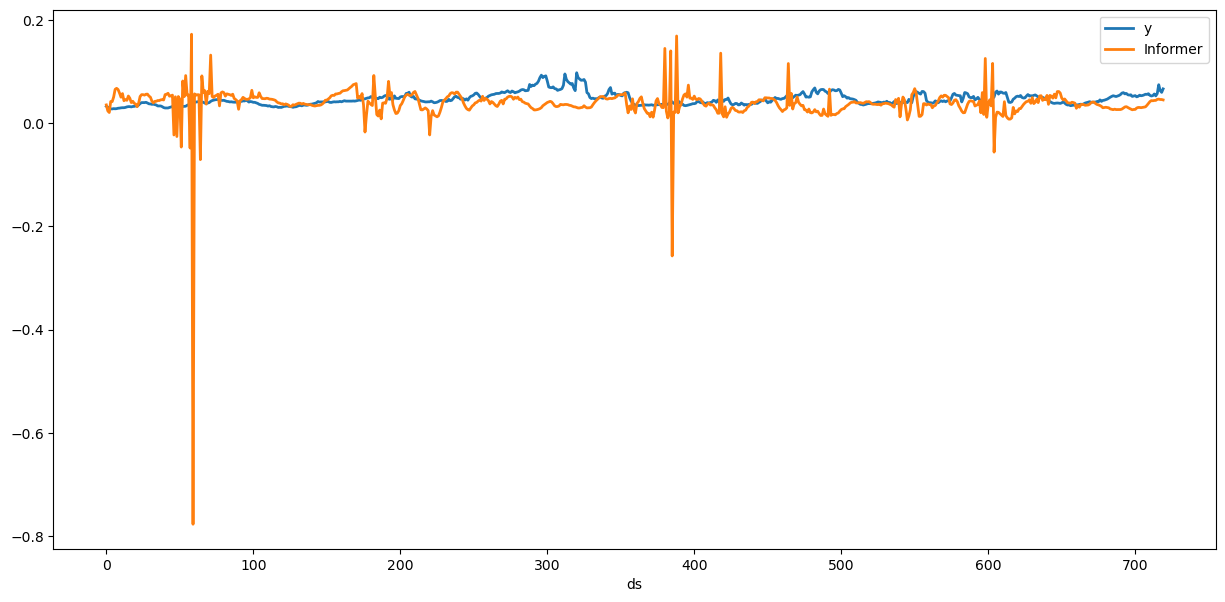

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Informer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,Informer
ds,
0,0.035221
1,0.023764
2,0.020490
3,0.041912
4,0.041600
...,...
715,0.045954
716,0.046467
717,0.045692


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_Informer = mae(Y_test_df['y'], forecasts['Informer'])
mse_Informer = mse(Y_test_df['y'], forecasts['Informer'])
print(f'Informer MAE: {mae_Informer:.4f}')
print(f'Informer MSE: {mse_Informer:.4f}')

Informer MAE: 0.0193
Informer MSE: 0.0017
